<a href="https://colab.research.google.com/github/sarnio1/data-analytics-project/blob/main/Video_Game_Industry_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case Study II (06/10/2023)**

#### Introduction

Welcome to my case study focusing on the **video game industry**. Our main goals in this project are:
1. *Finding the Oldest and Newest Games*. We want to know which games are the oldest and newest in our dataset.
2. *Spotting the Most Active Publisher*. Let's identify which publisher has released the most games.
3. *Discovering the Top-Selling Series*. We aim to find out which game series has generated the most sales.
4. *Recognizing the Leading Game Developer*. We'll highlight the developer behind the most games.
5. *Identifying the Busiest Game Series*. Which series has the most games?

To tackle these challenges, we'll follow a simple step-by-step approach:

1. **Data Import**. We'll bring our dataset into Google Colaboratory.

2. **Data Cleanup**. We'll tidy up the data, fixing data types, removing duplicates, and sorting out any typos or blank cells.

3. **Exploratory Data Analysis (EDA)**. We'll dig into the data to answer our business questions.

4. **Visualizing the Data**. We'll use charts and graphs to make our findings clear and easy to understand.

#### Case Study Resources
To access more materials connected to this case study, you can explore the following link:

#### [**Presentation Deck**](https://www.canva.com/design/DAFySR8e7-A/L3K_rpqVl8oX59HFGTlPCA/edit?utm_content=DAFySR8e7-A&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton)

# Library

In [ ]:
# These are libraries used for data cleaning and EDA
import pandas as pd #dataset
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization

#Video Game Industry Analysis

Our dataset has a few key attributes:

- `Name`: The game's unique name.
- `Sales`: The total copies sold since its first release.
- `Series`: The name of the game series it belongs to.
- `Release`: The game's first launch date, in a date/time format.
- `Genre`: The game's category.
- `Developer`: The team behind game development.
- `Publisher`: The company that published the game.

## Import file and read data

Link for the data:
####[**Video Game Industry (Google Sheets**)](https://docs.google.com/spreadsheets/d/1GQmkKv3E3k6_OyTuCxBpd7thWwpve7HJed63Jp_Id3A/edit?usp=sharing)

In [ ]:
# Import the dataset from spreadsheet
sheet_url = 'https://docs.google.com/spreadsheets/d/1GQmkKv3E3k6_OyTuCxBpd7thWwpve7HJed63Jp_Id3A/edit#gid=1485085913'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(sheet_url_trf)
# Show the first five rows of the dataset
df.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,12/1/2017,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,11/1/2011,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,5/1/2012,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,11/1/2006,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,5/1/2011,Action-adventure,Re-Logic,Re-Logic


## Cleaning Data

### 1. Changing data type

In [ ]:
# Check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       177 non-null    object 
 1   Sales      177 non-null    float64
 2   Series     141 non-null    object 
 3   Release    177 non-null    object 
 4   Genre      177 non-null    object 
 5   Developer  177 non-null    object 
 6   Publisher  177 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.8+ KB


The '**Release**' data type is currently inaccurate as it's formatted as an **object** instead of a **datetime**. Therefore, we will proceed to make the necessary adjustment.

In [ ]:
# Copy the initial DataFrame (optional)
df_cleaned = df.copy()
# Change data type for column 'Date'
df_cleaned['Release'] = pd.to_datetime(df_cleaned['Release'])
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       177 non-null    object        
 1   Sales      177 non-null    float64       
 2   Series     141 non-null    object        
 3   Release    177 non-null    datetime64[ns]
 4   Genre      177 non-null    object        
 5   Developer  177 non-null    object        
 6   Publisher  177 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 9.8+ KB


The '**Release**' data has now been successfully converted to the **datetime** data type.

### 2. Identifying missing values

In [ ]:
# Check for missing values
print(df_cleaned.info(),
      df_cleaned.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       177 non-null    object        
 1   Sales      177 non-null    float64       
 2   Series     141 non-null    object        
 3   Release    177 non-null    datetime64[ns]
 4   Genre      177 non-null    object        
 5   Developer  177 non-null    object        
 6   Publisher  177 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 9.8+ KB
None Name          0
Sales         0
Series       36
Release       0
Genre         0
Developer     0
Publisher     0
dtype: int64


In [401]:
# Check which rows have missing values (optional)
df_cleaned[df_cleaned.isnull().any(axis=1)]

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,2017-12-01,Battle royale,PUBG Studios,Krafton
3,Garry's Mod,20.0,NaN,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,2011-05-01,Action-adventure,Re-Logic,Re-Logic
10,Fall Guys,10.0,NaN,2020-08-01,Battle royale,Mediatonic,Devolver Digital
13,Rust,9.0,NaN,2018-02-01,Survival,Facepunch Studios,Facepunch Studios
20,Valheim,6.0,NaN,2021-02-01,Survival,Iron Gate,Coffee Stain Publishing
23,Cities: Skylines,5.0,NaN,2015-03-01,City-building,Colossal Order,Paradox Interactive
26,The Forest,5.0,NaN,2018-04-01,Survival,Endnight Games,Endnight Games
27,Cyberpunk 2077,4.5,NaN,2020-12-01,Action role-playing,CD Projekt Red,CD Projekt
28,DayZ,4.0,NaN,2013-12-01,Survival,Bohemia Interactive,Bohemia Interactive


The '**Series**' data contains **36** missing or blank values, and addressing these is essential for our analysis to effectively answer the business questions. To preserve our data samples and avoid data loss, we will not remove these missing values. Instead, we will label them as '**No Series**'.

In [ ]:
# Copy the initial DataFrame (optional)
df_replaced = df_cleaned.copy()
# Replace missing values represented as 'NaN' with 'No Series'
df_replaced.fillna("No Series", inplace=True)
# Recheck the missing values
print(df_replaced.info(),
      df_replaced.isnull().sum())
df_replaced.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       177 non-null    object        
 1   Sales      177 non-null    float64       
 2   Series     177 non-null    object        
 3   Release    177 non-null    datetime64[ns]
 4   Genre      177 non-null    object        
 5   Developer  177 non-null    object        
 6   Publisher  177 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 9.8+ KB
None Name         0
Sales        0
Series       0
Release      0
Genre        0
Developer    0
Publisher    0
dtype: int64


,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,No Series,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,No Series,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,No Series,2011-05-01,Action-adventure,Re-Logic,Re-Logic


After labeling all missing or blank values as '**No Series**' and conducting a thorough check, we confirm that there are no remaining missing values in the dataset.

### 3. Identifying duplicated data

In [403]:
# Check for duplicated data
df_replaced[df_replaced['Name'].duplicated()]

,Name,Sales,Series,Release,Genre,Developer,Publisher
175,StarCraft II: Heart of the Swarm,1.0,StarCraft,2013-03-01,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment
176,StarCraft II: Legacy of the Void,1.0,StarCraft,2015-11-01,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment


In [ ]:
# Calculate the number of rows with duplicated data
df_replaced['Name'].duplicated().sum()

2

We've identified **2 rows** with duplicated data, and we'll proceed to remove these duplicates while retaining the original entries.

In [ ]:
# Copy the initial DataFrame (optional)
df_removed = df_replaced.copy()
# Remove the duplicated data
df_removed = df_removed.drop_duplicates(['Name'])
# Recheck the duplicated data
print(df_removed[df_removed['Name'].duplicated()])
print(df_removed['Name'].duplicated().sum())

Empty DataFrame
Columns: [Name, Sales, Series, Release, Genre, Developer, Publisher]
Index: []
0


After removing duplicated data and conducting a subsequent check, we can confirm that no duplicate entries remain in the dataset.

We chose to concentrate on the '**Name**' column when identifying duplicated data because this column holds distinctive values that should remain unrepeatable within the dataset.

## Exploratory Data Analysis (EDA)

### 1. Descriptive Statistics

In [ ]:
# Create a copy of the cleaned DataFrame
df1 = df_removed.copy()
# Conduct descriptive statistics
df1.describe(include='all')

<ipython-input-358-7ce35b94bf69>:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df1.describe(include='all')


,Name,Sales,Series,Release,Genre,Developer,Publisher
count,175,175.000000,175,175,175,175,175
unique,175,NaN,92,130,61,109,96
top,PlayerUnknown's Battlegrounds,NaN,No Series,2004-03-01 00:00:00,Real-time strategy,Blizzard Entertainment,Electronic Arts
freq,1,NaN,36,4,24,8,19
first,NaN,NaN,NaN,1984-12-01 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,2021-02-01 00:00:00,NaN,NaN,NaN
mean,NaN,3.141143,NaN,NaN,NaN,NaN,NaN
std,NaN,4.960513,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN


Here are the insights we can gather from the descriptive statistics:

- The dataset comprises 175 games.
- The game "PlayerUnknown's Battlegrounds" has the highest sales.
- There are 92 unique game series.
- The dataset covers 130 unique release dates.
- There are 61 different game genres.
- A total of 109 game developers are represented.
- Electronic Arts is the top game publisher with 19 releases.
- The oldest game in the dataset was released on December 1, 1984.
- The newest game in the dataset was released on February 1, 2021.
- The average sales amount for games is approximately 3.14, with a standard deviation of 4.96.
- The minimum sales value is 1, and the maximum is 42.

### 2. What are the oldest and newest games in the dataset?

In [ ]:
# Decompose 'Release' into year, month, and day (optional)
df1['Release_Year'] = df1['Release'].dt.year
df1['Release_Month'] = df1['Release'].dt.month
df1['Release_Day'] = df1['Release'].dt.day
# Determine the current year to subtract from the release year
current_year = pd.to_datetime('today').year
# Add column 'Game Age'
df1['Game_Age'] = current_year - df1['Release_Year']
df1.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher,Release_Year,Release_Month,Release_Day,Game_Age
0,PlayerUnknown's Battlegrounds,42.0,No Series,2017-12-01,Battle royale,PUBG Studios,Krafton,2017,12,1,6
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios,2011,11,1,12
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment,2012,5,1,11
3,Garry's Mod,20.0,No Series,2006-11-01,Sandbox,Facepunch Studios,Valve,2006,11,1,17
4,Terraria,17.2,No Series,2011-05-01,Action-adventure,Re-Logic,Re-Logic,2011,5,1,12


In [ ]:
# Sort the DataFrame in ascending order based on the release date to obtain the oldest game
df1.sort_values(by='Release').head(3)

,Name,Sales,Series,Release,Genre,Developer,Publisher,Release_Year,Release_Month,Release_Day,Game_Age
133,Hydlide,1.0,Hydlide,1984-12-01,Action role-playing,Technology and Entertainment Software,Technology and Entertainment Software,1984,12,1,39
34,Where in the World Is Carmen Sandiego?,4.0,Carmen Sandiego,1985-06-01,Educational,Broderbund,Broderbund,1985,6,1,38
88,International Karate,1.5,International Karate,1985-11-01,Fighting,System 3,Epyx,1985,11,1,38


In [ ]:
# Group the related columns to gain a better understanding
released_games = df1.groupby(['Name', 'Release', 'Release_Year'])['Game_Age'].unique().reset_index()
# Sort the grouped table in ascending order based on the release date and show the first three rows
released_games.sort_values(by='Release').head(3)

,Name,Release,Release_Year,Game_Age
81,Hydlide,1984-12-01,1984,[39]
170,Where in the World Is Carmen Sandiego?,1985-06-01,1985,[38]
83,International Karate,1985-11-01,1985,[38]


The oldest game in the dataset is **Hydlide**, released on **December 1, 1984**, and categorized as an Action role-playing game. It was developed and published by Technology and Entertainment Software. The game has been in existence for **39 years**.

In [ ]:
# Sort the DataFrame in descending order based on the release year to obtain the newest game
df1.sort_values(by='Release_Year', ascending=False).head(3)

,Name,Sales,Series,Release,Genre,Developer,Publisher,Release_Year,Release_Month,Release_Day,Game_Age
20,Valheim,6.0,No Series,2021-02-01,Survival,Iron Gate,Coffee Stain Publishing,2021,2,1,2
27,Cyberpunk 2077,4.5,No Series,2020-12-01,Action role-playing,CD Projekt Red,CD Projekt,2020,12,1,3
110,Crusader Kings III,1.0,Crusader Kings,2020-09-01,Grand strategy,Paradox Development Studio,Paradox Interactive,2020,9,1,3


In [ ]:
# Group the related columns to gain a better understanding
released_games = df1.groupby(['Name', 'Release', 'Release_Year'])['Game_Age'].unique().reset_index()
# Sort the grouped table in descending order basen on the release date and show the first three rows
released_games.sort_values(by='Release', ascending=False).head(3)

,Name,Release,Release_Year,Game_Age
164,Valheim,2021-02-01,2021,[2]
39,Cyberpunk 2077,2020-12-01,2020,[3]
35,Crusader Kings III,2020-09-01,2020,[3]


The newest game in the dataset is **Valheim**, which was released on **February 1, 2021**. It falls under the Survival genre and was developed by Iron Gate and published by Coffee Stain Publishing. As of now, the game is just **2 years** old, making it one of the most recent additions to the gaming industry.

### 3. Which publisher has the highest number of game releases?

In [ ]:
# Find the publisher that has the highest number of game releases
df['Publisher'].value_counts().idxmax()

'Electronic Arts'

In [ ]:
# Find the number of games released by the publisher
df1['Publisher'].value_counts()

Electronic Arts           19
Blizzard Entertainment     8
Paradox Interactive        7
Activision                 6
GT Interactive             5
                          ..
Landfall Games             1
Headup Games               1
Atari, Inc                 1
Konami                     1
Blue Fang Games            1
Name: Publisher, Length: 96, dtype: int64

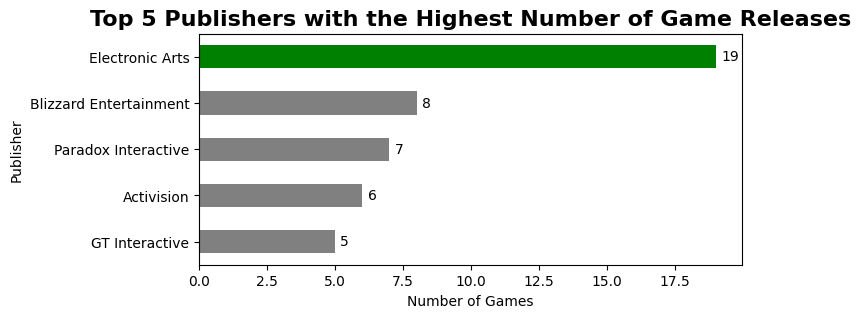

In [ ]:
# Visualize the result
top_publishers = df1['Publisher'].value_counts().head(5)
plt.figure(figsize=(7, 3))
colors = ['green' if i == top_publishers.idxmax() else 'gray' for i in top_publishers.index]
ax = top_publishers.plot(kind='barh', color = colors)
plt.xlabel('Number of Games')
plt.ylabel('Publisher')
plt.title('Top 5 Publishers with the Highest Number of Game Releases',
          fontdict={'fontsize': 16, 'fontweight': 'bold'})
for i, v in enumerate(top_publishers):
    ax.text(v + 0.2, i, str(v), color='black', fontsize=10, va='center')
plt.gca().invert_yaxis()

The publisher **Electronic Arts** has released the highest number of games in the dataset, totaling **19 games**. This makes Electronic Arts the most prolific publisher among the others.

### 4. Which developer has the highest number of games developed?

In [ ]:
# Find the developer that has the highest number of games developed
df['Developer'].value_counts().idxmax()

'Blizzard Entertainment'

In [ ]:
# Find the number of games developed by the developer
df1['Developer'].value_counts()

Blizzard Entertainment             8
Maxis                              6
Paradox Development Studio         5
id Software                        4
Westwood Studios                   4
                                  ..
Kojima Productions                 1
Edmund McMillen & Florian Himsl    1
Landfall Games                     1
Keen Software House                1
Microsoft                          1
Name: Developer, Length: 109, dtype: int64

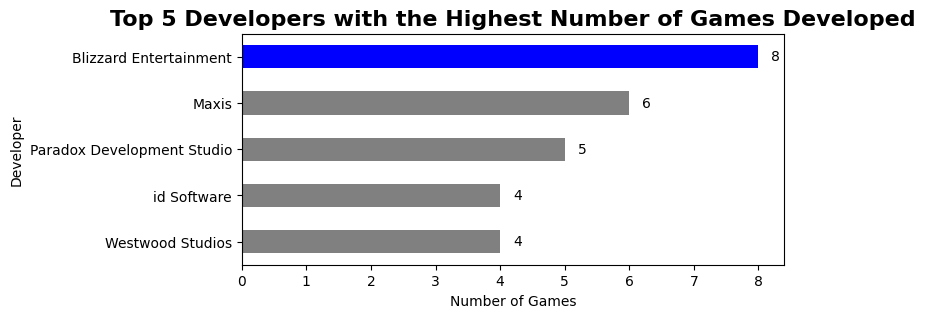

In [ ]:
# Visualize the result
top_developers = df1['Developer'].value_counts().head(5)
plt.figure(figsize=(7, 3))
colors = ['blue' if i == top_developers.idxmax() else 'gray' for i in top_developers.index]
ax1 = top_developers.plot(kind='barh', color = colors)
plt.xlabel('Number of Games')
plt.ylabel('Developer')
plt.title('Top 5 Developers with the Highest Number of Games Developed',
          fontdict={'fontsize': 16, 'fontweight': 'bold'})
for i, v in enumerate(top_developers):
    ax1.text(v + 0.2, i, str(v), color='black', fontsize=10, va='center')
plt.gca().invert_yaxis()

**Blizzard Entertainment** is the top game developer in the dataset, having created **8 games**, the most among all developers.

### 5. Which series generated the highest sales?

In [ ]:
# Number of sales for each series
agg_sales = df1.groupby('Series', as_index=False).agg({'Sales':'sum'}).sort_values(by='Sales', ascending=False)
agg_sales.head()

,Series,Sales
51,No Series,156.1
47,Minecraft,33.0
22,Diablo,26.0
76,The Sims,24.0
36,Half-Life,21.0


In [ ]:
# Ignore 'No Series' data
agg_sales1 = agg_sales.iloc[1:6]
agg_sales1

,Series,Sales
47,Minecraft,33.0
22,Diablo,26.0
76,The Sims,24.0
36,Half-Life,21.0
86,Warcraft,19.0


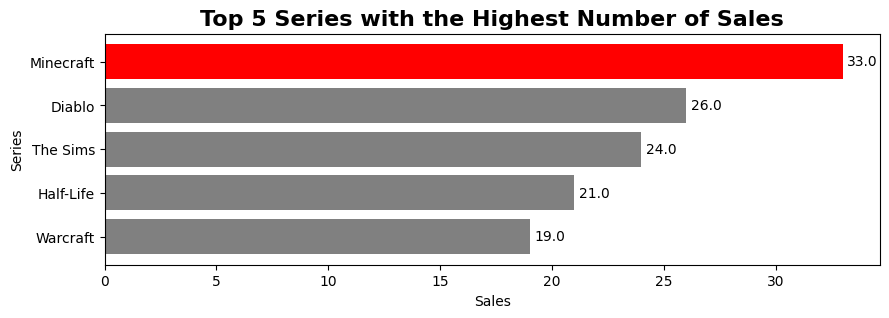

In [ ]:
# Visualize the result
top_sales = agg_sales1
plt.figure(figsize=(10, 3))
colors = ['red' if i == top_sales['Sales'].idxmax() else 'gray' for i in top_sales['Sales'].index]
plt.barh(top_sales['Series'], top_sales['Sales'], color=colors)
plt.xlabel('Sales')
plt.ylabel('Series')
plt.title('Top 5 Series with the Highest Number of Sales',
          fontdict={'fontsize': 16, 'fontweight': 'bold'})
for i, v in enumerate(top_sales['Sales']):
    plt.text(v + 0.2, i, str(v), color='black', fontsize=10, va='center')
plt.gca().invert_yaxis()

It appears that the **Minecraft** series has the highest sales with **33.0 (units) sold**. The other entries, such as Diablo, The Sims, and Half-Life, have lower sales figures. The No Series entry is a standalone product with **156.1 (units) sold** and does not belong to any specific series.

### 6. Which series has the highest number of games?

In [ ]:
# Number of games for each series
agg_games = df1.groupby('Series', as_index=False).agg({'Name':'nunique'}).sort_values(by='Name', ascending=False)
agg_games = agg_games.rename(columns={'Name': 'Number of Games'})
agg_games.head()

,Series,Number of Games
51,No Series,36
13,Command & Conquer,5
69,StarCraft,4
2,Age of Empires,4
12,Civilization,4


In [ ]:
# Ignore 'No Series' data
agg_games1 = agg_games.iloc[1:6]
agg_games1

,Series,Number of Games
13,Command & Conquer,5
69,StarCraft,4
2,Age of Empires,4
12,Civilization,4
20,Dark Souls,3


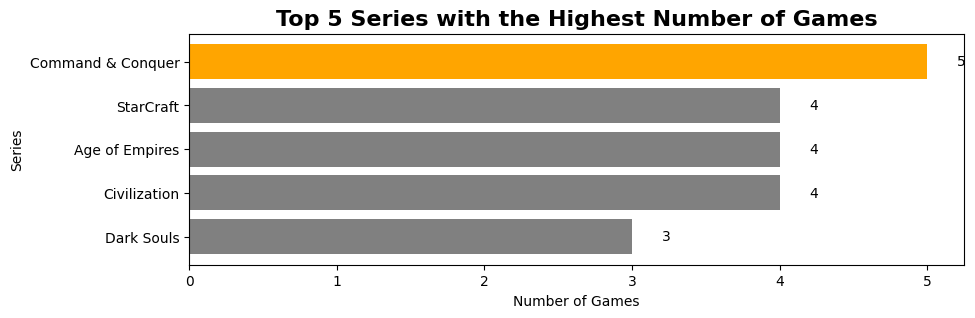

In [399]:
# Visualize the result
top_series = agg_games1
plt.figure(figsize=(10, 3))
colors = ['orange' if i == top_series['Number of Games'].idxmax() else 'gray' for i in top_series['Number of Games'].index]
plt.barh(top_series['Series'], top_series['Number of Games'], color=colors)
plt.xlabel('Number of Games')
plt.ylabel('Series')
plt.title('Top 5 Series with the Highest Number of Games',
          fontdict={'fontsize': 16, 'fontweight': 'bold'})
for i, v in enumerate(top_series['Number of Games']):
    plt.text(v + 0.2, i, str(v), color='black', fontsize=10, va='center')
plt.gca().invert_yaxis()

The series with the highest number of games is **Command & Conquer** with **5 games**. We excluded No Series entries because they don't represent a series of games but rather individual games that are not part of any named series.

## Export file

In [ ]:
# Export cleaned data to CSV format
from google.colab import files
df1.to_csv('Video Game Industry_Case Study 2.csv')
files.download('Video Game Industry_Case Study 2.csv')

You can access the cleaned data from the following source:

#### [**Cleaned Data**](https://docs.google.com/spreadsheets/d/1qLG3B-3j7jluxb_4qNMCUakT5s_Qg_5eRwHzRTk8t6Y/edit?usp=sharing)